In [2]:
import pandas as pd
import plotly.express as px

# Read the data from the Excel file
df = pd.read_excel('data.xlsx')

In [3]:
# Visualization 1: Bar Chart - Material Composition
material_composition_counts = df['Material Composition'].value_counts()

fig1 = px.bar(material_composition_counts, x=material_composition_counts.index, y=material_composition_counts.values,
              labels={'x': 'Material Composition', 'y': 'Count'},
              title='Distribution of Aircraft Components by Material Composition')

fig1.show()

# Visualization 2: Pie Chart - Proportion of New and Recycled Parts by Carbon Footprint
carbon_footprint_labels = ['New Parts', 'Recycled Parts']
carbon_footprint_values = [df['New Parts Carbon Footprint (kg CO2e)'].sum(), df['Recycled Parts Carbon Footprint (kg CO2e)'].sum()]

fig2 = px.pie(names=carbon_footprint_labels, values=carbon_footprint_values,
              title='Proportion of New and Recycled Parts by Carbon Footprint')

fig2.show()


In [4]:
# Scatter plot: Age of Components vs Recycling Rates
fig = px.scatter(df, x='Age (years)', y='Recycling Rate (%)',
                 title='Age of Components vs Recycling Rates',
                 labels={'Age (years)': 'Age of Components', 'Recycling Rate (%)': 'Recycling Rate'})

fig.show()


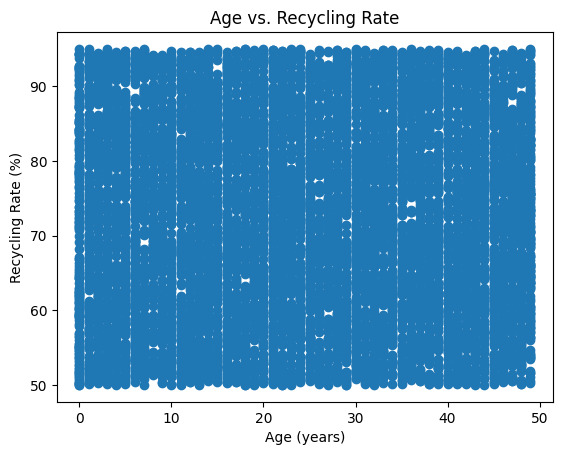

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['Age (years)'], df['Recycling Rate (%)'])
plt.xlabel('Age (years)')
plt.ylabel('Recycling Rate (%)')
plt.title('Age vs. Recycling Rate')
plt.show()

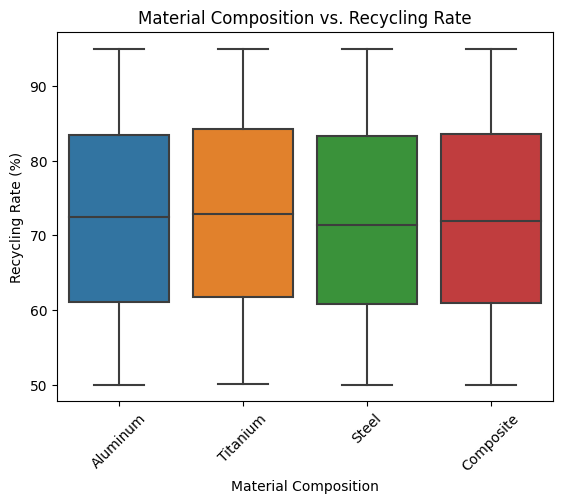

In [6]:
import seaborn as sns

sns.boxplot(x=df['Material Composition'], y=df['Recycling Rate (%)'])
plt.xlabel('Material Composition')
plt.ylabel('Recycling Rate (%)')
plt.title('Material Composition vs. Recycling Rate')
plt.xticks(rotation=45)
plt.show()

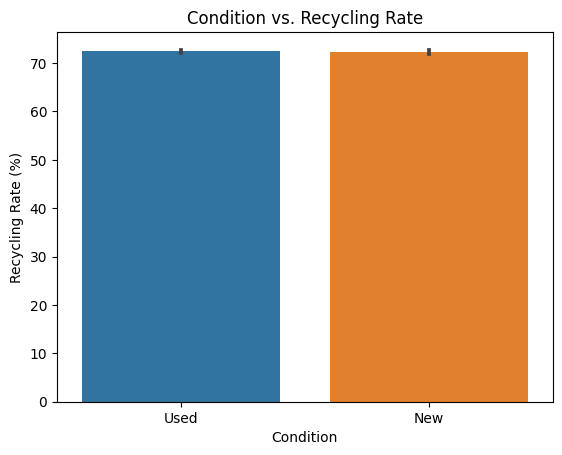

In [7]:
import seaborn as sns

sns.barplot(x=df['Condition'], y=df['Recycling Rate (%)'])
plt.xlabel('Condition')
plt.ylabel('Recycling Rate (%)')
plt.title('Condition vs. Recycling Rate')
plt.show()

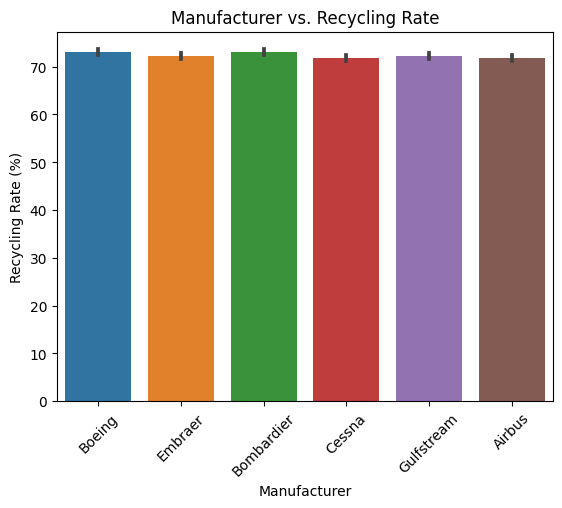

In [8]:
import seaborn as sns

sns.barplot(x=df['Manufacturer'], y=df['Recycling Rate (%)'])
plt.xlabel('Manufacturer')
plt.ylabel('Recycling Rate (%)')
plt.title('Manufacturer vs. Recycling Rate')
plt.xticks(rotation=45)
plt.show()

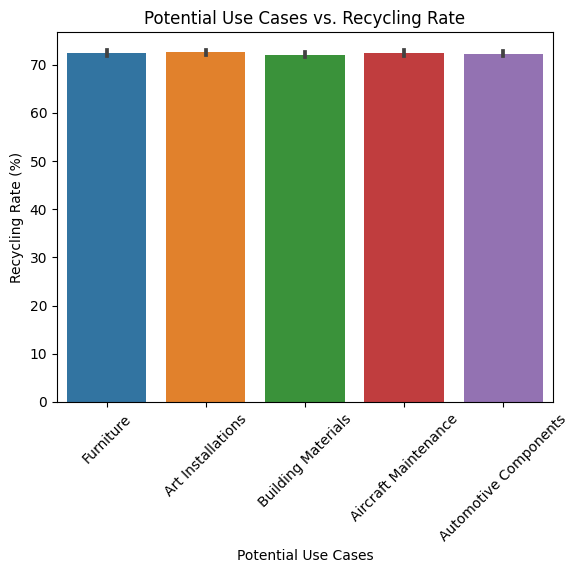

In [9]:
import seaborn as sns

sns.barplot(x=df['Potential Use Cases'], y=df['Recycling Rate (%)'])
plt.xlabel('Potential Use Cases')
plt.ylabel('Recycling Rate (%)')
plt.title('Potential Use Cases vs. Recycling Rate')
plt.xticks(rotation=45)
plt.show()

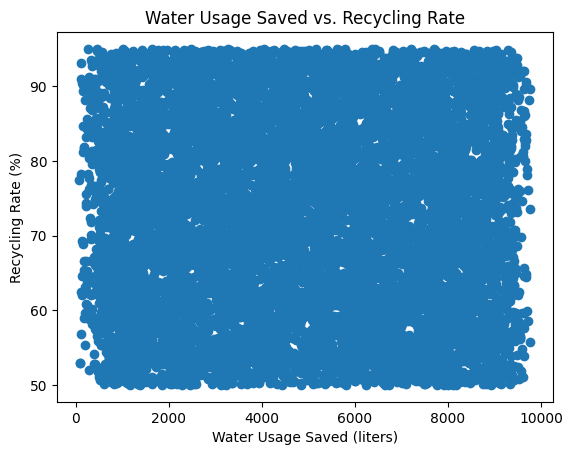

In [10]:
plt.scatter(df['Water Usage Saved (liters)'], df['Recycling Rate (%)'])
plt.xlabel('Water Usage Saved (liters)')
plt.ylabel('Recycling Rate (%)')
plt.title('Water Usage Saved vs. Recycling Rate')
plt.show()


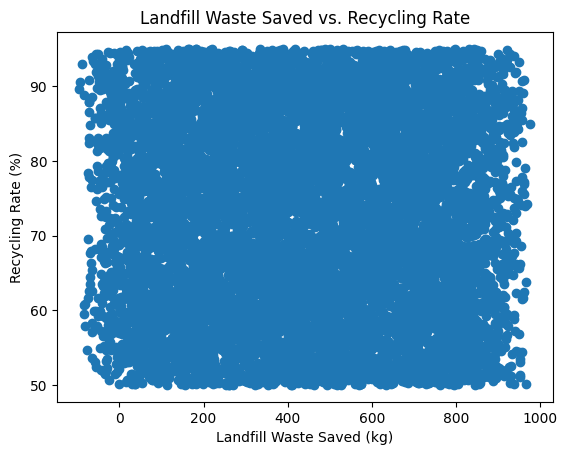

In [11]:
plt.scatter(df['Landfill Waste Saved (kg)'], df['Recycling Rate (%)'])
plt.xlabel('Landfill Waste Saved (kg)')
plt.ylabel('Recycling Rate (%)')
plt.title('Landfill Waste Saved vs. Recycling Rate')
plt.show()


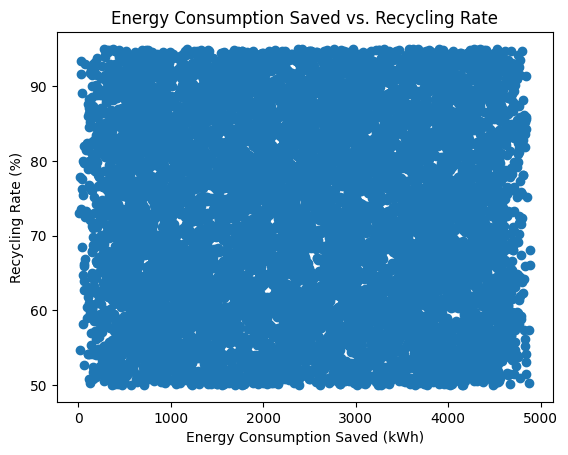

In [12]:
plt.scatter(df['Energy Consumption Saved (kWh)'], df['Recycling Rate (%)'])
plt.xlabel('Energy Consumption Saved (kWh)')
plt.ylabel('Recycling Rate (%)')
plt.title('Energy Consumption Saved vs. Recycling Rate')
plt.show()


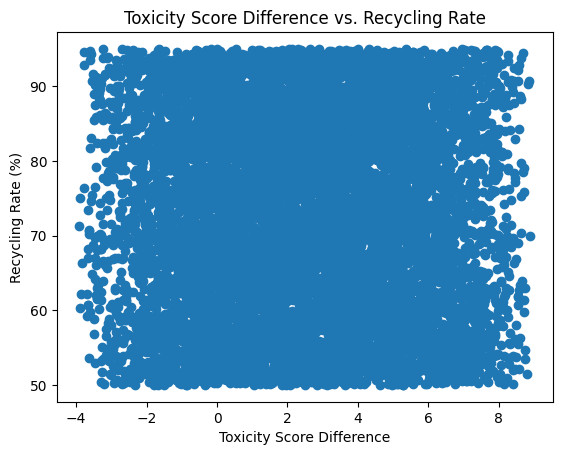

In [13]:
plt.scatter(df['Toxicity Score Difference'], df['Recycling Rate (%)'])
plt.xlabel('Toxicity Score Difference')
plt.ylabel('Recycling Rate (%)')
plt.title('Toxicity Score Difference vs. Recycling Rate')
plt.show()

### Logistic regression example

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Read the data from the Excel file
df = pd.read_excel('data.xlsx')

# Select relevant features and target variable
features = ['Material Composition', 'Age (years)', 'Condition']
target = 'Recycling Rate (%)'

# Convert categorical features into numerical using one-hot encoding
df_encoded = pd.get_dummies(df[features])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df[target], test_size=0.2, random_state=42)

# Create a linear regression model
regressor = LinearRegression()

# Train the model on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)


In [14]:
import pandas as pd
import plotly.express as px

# Group the data by location and count the occurrences of each manufacturer
location_manufacturer_counts = df.groupby(['Location', 'Manufacturer']).size().reset_index(name='Count')

# Sort the manufacturers within each location by count in descending order
location_manufacturer_counts = location_manufacturer_counts.sort_values(['Location', 'Count'], ascending=[True, False])

# Extract the top 5 manufacturers for each location
top_manufacturers_by_location = location_manufacturer_counts.groupby('Location').head(5)

# Create an interactive bar plot using Plotly
fig = px.bar(top_manufacturers_by_location, x='Location', y='Count', color='Manufacturer',
             title='Top 5 Manufacturers by Location')
fig.update_layout(xaxis_title='Location', yaxis_title='Count')

# Show the interactive plot
fig.show()


In [15]:
import pandas as pd
import plotly.express as px

# Group the data by location, manufacturer, potential use cases, and material composition
manufacturer_details = df.groupby(['Location', 'Manufacturer', 'Potential Use Cases', 'Material Composition']).size().reset_index(name='Count')

# Sort the manufacturers within each location by count in descending order
manufacturer_details = manufacturer_details.sort_values(['Location', 'Count'], ascending=[True, False])

# Extract the top 5 manufacturers for each location
top_manufacturers_by_location = manufacturer_details.groupby('Location').head(5)

# Create an interactive bar plot using Plotly
fig = px.bar(top_manufacturers_by_location, x='Location', y='Count', color='Manufacturer',
             hover_data=['Potential Use Cases', 'Material Composition'],
             title='Top 5 Manufacturers by Location')
fig.update_layout(xaxis_title='Location', yaxis_title='Count')

# Show the interactive plot
fig.show()


In [27]:
import pandas as pd
import plotly.graph_objects as go

# Group the data by manufacturer and calculate the sum of Carbon Footprint and Energy Consumption for Used Parts and Recycled Parts
manufacturer_stats = df.groupby('Manufacturer').agg({
    'Carbon Footprint - Used Parts (kg CO2e)': 'sum',
    'Carbon Footprint - Recycled Parts (kg CO2e)': 'sum',
    'Energy Consumption - Used Parts (kWh)': 'sum',
    'Energy Consumption - Recycled Parts (kWh)': 'sum'
}).reset_index()

# Create the grouped bar chart
fig = go.Figure(data=[
    go.Bar(name='Used Parts - Carbon Footprint', x=manufacturer_stats['Manufacturer'], y=manufacturer_stats['Carbon Footprint - Used Parts (kg CO2e)']),
    go.Bar(name='Recycled Parts - Carbon Footprint', x=manufacturer_stats['Manufacturer'], y=manufacturer_stats['Carbon Footprint - Recycled Parts (kg CO2e)']),
    go.Bar(name='Used Parts - Energy Consumption', x=manufacturer_stats['Manufacturer'], y=manufacturer_stats['Energy Consumption - Used Parts (kWh)']),
    go.Bar(name='Recycled Parts - Energy Consumption', x=manufacturer_stats['Manufacturer'], y=manufacturer_stats['Energy Consumption - Recycled Parts (kWh)'])
])

# Update the layout of the plot
fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Carbon Footprint and Energy Consumption for Used Parts and Recycled Parts by Manufacturer',
                  xaxis_title='Manufacturer', yaxis_title='Metric')

# Show the interactive plot
fig.show()


KeyError: ignored

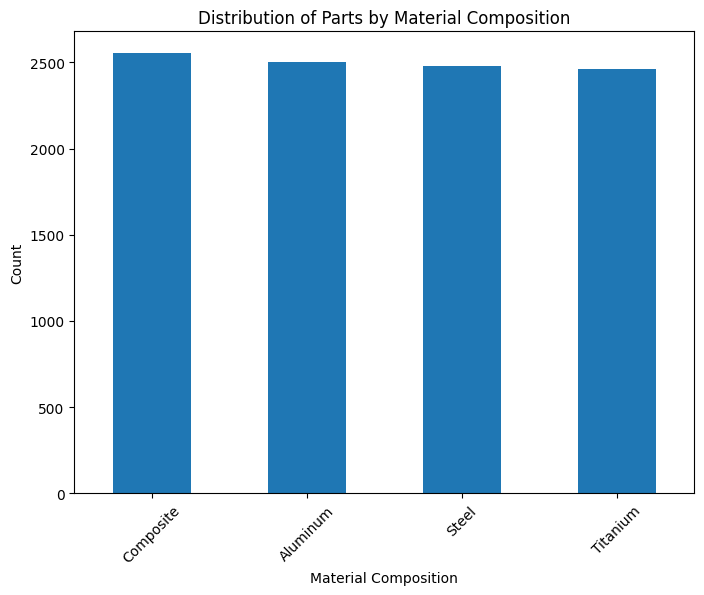

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the dataset into a Pandas DataFrame called 'df'

# Grouping the parts by material composition and calculating the count
material_counts = df['Material Composition'].value_counts()

# Creating the bar chart
plt.figure(figsize=(8, 6))
material_counts.plot(kind='bar')
plt.title('Distribution of Parts by Material Composition')
plt.xlabel('Material Composition')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Displaying the interactive plot
plt.show()


In [17]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have loaded the dataset into a Pandas DataFrame called 'df'

# Creating the histogram
fig = go.Figure()

fig.add_trace(go.Histogram(x=df['Age (years)']))

# Adding labels and title
fig.update_layout(
    title='Age Distribution of Parts',
    xaxis_title='Age (years)',
    yaxis_title='Count'
)

# Displaying the interactive plot
fig.show()


In [18]:
import pandas as pd
import plotly.graph_objects as go

# Group the data by location, manufacturer, and potential use cases
use_cases_counts = df.groupby(['Location', 'Manufacturer', 'Potential Use Cases']).size().reset_index(name='Count')

# Sort the manufacturers within each location by count in descending order
use_cases_counts = use_cases_counts.sort_values(['Location', 'Count'], ascending=[True, False])

# Extract the top 5 manufacturers for each location
top_manufacturers_by_location = use_cases_counts.groupby('Location').head(5)

# Create a bar plot for Potential Use Cases
fig_use_cases = go.Figure()

for location in top_manufacturers_by_location['Location'].unique():
    data = top_manufacturers_by_location[top_manufacturers_by_location['Location'] == location]
    fig_use_cases.add_trace(go.Bar(
        x=data['Manufacturer'],
        y=data['Count'],
        name=location,
    ))

fig_use_cases.update_layout(
    xaxis_title='Manufacturer',
    yaxis_title='Count',
    title='Top 5 Manufacturers by Potential Use Cases',
    barmode='group'
)

# Show the bar plot for Potential Use Cases
fig_use_cases.show()


# Group the data by location, manufacturer, and material composition
material_counts = df.groupby(['Location', 'Manufacturer', 'Material Composition']).size().reset_index(name='Count')

# Sort the manufacturers within each location by count in descending order
material_counts = material_counts.sort_values(['Location', 'Count'], ascending=[True, False])

# Extract the top 5 manufacturers for each location
top_manufacturers_by_location = material_counts.groupby('Location').head(5)

# Create a bar plot for Material Composition
fig_material = go.Figure()

for location in top_manufacturers_by_location['Location'].unique():
    data = top_manufacturers_by_location[top_manufacturers_by_location['Location'] == location]
    fig_material.add_trace(go.Bar(
        x=data['Manufacturer'],
        y=data['Count'],
        name=location,
    ))

fig_material.update_layout(
    xaxis_title='Manufacturer',
    yaxis_title='Count',
    title='Top 5 Manufacturers by Material Composition',
    barmode='group'
)

# Show the bar plot for Material Composition
fig_material.show()


In [19]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have loaded the dataset into a Pandas DataFrame called 'df'

# Grouping the data by 'Part Name' and calculating the mean carbon footprints
grouped_df = df.groupby('Part Name').mean()[['New Parts Carbon Footprint (kg CO2e)', 'Recycled Parts Carbon Footprint (kg CO2e)']]

# Creating the grouped bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['New Parts Carbon Footprint (kg CO2e)'],
    name='New Parts'
))

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Recycled Parts Carbon Footprint (kg CO2e)'],
    name='Recycled Parts'
))

# Adding labels and title
fig.update_layout(
    title='Comparison of Carbon Footprint between New and Recycled Parts',
    xaxis_title='Part Name',
    yaxis_title='Carbon Footprint (kg CO2e)',
    barmode='group'
)

# Displaying the interactive plot
fig.show()


<ipython-input-19-dd43ac32b917>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [20]:
import pandas as pd
import plotly.graph_objects as go

# Group the data by location, manufacturer, and potential use cases
use_cases_counts = df.groupby(['Location', 'Manufacturer', 'Potential Use Cases']).size().reset_index(name='Count')

# Sort the manufacturers within each location by count in descending order
use_cases_counts = use_cases_counts.sort_values(['Location', 'Count'], ascending=[True, False])

# Extract the top 5 manufacturers for each location
top_manufacturers_by_location_use_cases = use_cases_counts.groupby('Location').head(5)

# Create a bar plot for Potential Use Cases
fig_use_cases = go.Figure()

for location in top_manufacturers_by_location_use_cases['Location'].unique():
    data = top_manufacturers_by_location_use_cases[top_manufacturers_by_location_use_cases['Location'] == location]
    fig_use_cases.add_trace(go.Bar(
        x=data['Manufacturer'],
        y=data['Count'],
        name=location,
    ))

fig_use_cases.update_layout(
    xaxis_title='Manufacturer',
    yaxis_title='Count',
    title='Top 5 Manufacturers by Potential Use Cases',
    barmode='group'
)

# Show the bar plot for Potential Use Cases
fig_use_cases.show()


# Group the data by location, manufacturer, and material composition
material_counts = df.groupby(['Location', 'Manufacturer', 'Material Composition']).size().reset_index(name='Count')

# Sort the manufacturers within each location by count in descending order
material_counts = material_counts.sort_values(['Location', 'Count'], ascending=[True, False])

# Extract the top 5 manufacturers for each location
top_manufacturers_by_location_material = material_counts.groupby('Location').head(5)

# Create a bar plot for Material Composition
fig_material = go.Figure()

for location in top_manufacturers_by_location_material['Location'].unique():
    data = top_manufacturers_by_location_material[top_manufacturers_by_location_material['Location'] == location]
    fig_material.add_trace(go.Bar(
        x=data['Manufacturer'],
        y=data['Count'],
        name=location,
    ))

fig_material.update_layout(
    xaxis_title='Manufacturer',
    yaxis_title='Count',
    title='Top 5 Manufacturers by Material Composition',
    barmode='group'
)

# Show the bar plot for Material Composition
fig_material.show()


In [21]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have loaded the dataset into a Pandas DataFrame called 'df'

# Grouping the data by 'Material Composition' and calculating the mean values for each metric
grouped_df = df.groupby('Material Composition').mean()

# Creating the grouped bar chart for carbon footprint
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['New Parts Carbon Footprint (kg CO2e)'],
    name='New Parts - Carbon Footprint'
))

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Recycled Parts Carbon Footprint (kg CO2e)'],
    name='Recycled Parts - Carbon Footprint'
))

# Adding labels and title for the carbon footprint chart
fig.update_layout(
    title='Comparison of Carbon Footprint, Water Usage, Landfill Waste, and Energy Consumption between New and Recycled Parts by Material Composition',
    xaxis_title='Material Composition',
    yaxis_title='Value',
    barmode='group'
)

# Creating the grouped bar chart for water usage
fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Water Usage - New Parts (liters)'],
    name='New Parts - Water Usage'
))

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Water Usage - Recycled Parts (liters)'],
    name='Recycled Parts - Water Usage'
))

# Creating the grouped bar chart for landfill waste
fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Landfill Waste - New Parts (kg)'],
    name='New Parts - Landfill Waste'
))

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Landfill Waste - Recycled Parts (kg)'],
    name='Recycled Parts - Landfill Waste'
))

# Creating the grouped bar chart for energy consumption
fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Energy Consumption - New Parts (kWh)'],
    name='New Parts - Energy Consumption'
))

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Energy Consumption - Recycled Parts (kWh)'],
    name='Recycled Parts - Energy Consumption'
))

# Updating the layout for the combined chart
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

# Displaying the interactive plot
fig.show()


<ipython-input-21-8973916f2f9f>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [22]:
import pandas as pd
import plotly.graph_objects as go

# Group the data by location, manufacturer, potential use cases, and material composition
details_counts = df.groupby(['Location', 'Manufacturer', 'Potential Use Cases', 'Material Composition']).size().reset_index(name='Count')

# Sort the manufacturers within each location by count in descending order
details_counts = details_counts.sort_values(['Location', 'Count'], ascending=[True, False])

# Extract the top 5 manufacturers for each location
top_manufacturers_by_location = details_counts.groupby('Location').head(5)

# Create a bar plot for Potential Use Cases
fig_use_cases = go.Figure()

for location in top_manufacturers_by_location['Location'].unique():
    data = top_manufacturers_by_location[top_manufacturers_by_location['Location'] == location]
    fig_use_cases.add_trace(go.Bar(
        x=data['Manufacturer'] + ' (' + data['Material Composition'] + ')',
        y=data['Count'],
        name=location,
    ))

fig_use_cases.update_layout(
    xaxis_title='Manufacturer (Material Composition)',
    yaxis_title='Count',
    title='Top 5 Manufacturers by Potential Use Cases',
    barmode='group'
)

# Show the bar plot for Potential Use Cases
fig_use_cases.show()


# Create a bar plot for Material Composition
fig_material = go.Figure()

for location in top_manufacturers_by_location['Location'].unique():
    data = top_manufacturers_by_location[top_manufacturers_by_location['Location'] == location]
    fig_material.add_trace(go.Bar(
        x=data['Manufacturer'] + ' (' + data['Material Composition'] + ')',
        y=data['Count'],
        name=location,
    ))

fig_material.update_layout(
    xaxis_title='Manufacturer (Material Composition)',
    yaxis_title='Count',
    title='Top 5 Manufacturers by Material Composition',
    barmode='group'
)

# Show the bar plot for Material Composition
fig_material.show()


In [24]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have loaded the dataset into a Pandas DataFrame called 'df'

# Grouping the data by 'Manufacturer' and calculating the mean values for each metric
grouped_df = df.groupby('Manufacturer').mean()

# Creating the grouped bar chart for carbon footprint
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['New Parts Carbon Footprint (kg CO2e)'],
    name='New Parts - Carbon Footprint'
))

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Recycled Parts Carbon Footprint (kg CO2e)'],
    name='Recycled Parts - Carbon Footprint'
))

# Adding labels and title for the carbon footprint chart
fig.update_layout(
    title='Comparison of Carbon Footprint, Water Usage, Landfill Waste, and Energy Consumption between New and Recycled Parts by Manufacturer',
    xaxis_title='Manufacturer',
    yaxis_title='Value',
    barmode='group'
)

# Creating the grouped bar chart for water usage
fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Water Usage - New Parts (liters)'],
    name='New Parts - Water Usage'
))

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Water Usage - Recycled Parts (liters)'],
    name='Recycled Parts - Water Usage'
))

# Creating the grouped bar chart for landfill waste
fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Landfill Waste - New Parts (kg)'],
    name='New Parts - Landfill Waste'
))

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Landfill Waste - Recycled Parts (kg)'],
    name='Recycled Parts - Landfill Waste'
))

# Creating the grouped bar chart for energy consumption
fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Energy Consumption - New Parts (kWh)'],
    name='New Parts - Energy Consumption'
))

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Energy Consumption - Recycled Parts (kWh)'],
    name='Recycled Parts - Energy Consumption'
))

# Updating the layout for the combined chart
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

# Displaying the interactive plot
fig.show()


<ipython-input-24-5aad775623ca>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [25]:
import plotly.graph_objects as go
import pandas as pd

# Assuming you have loaded the dataset into a Pandas DataFrame called 'df'

# Grouping the data by 'Part Name' and calculating the mean recycling rate for each part type
grouped_df = df.groupby('Part Name').mean()

# Creating the stacked bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_df.index,
    y=grouped_df['Recycling Rate (%)'],
    name='Recycling Rate'
))

# Adding labels and title for the chart
fig.update_layout(
    title='Recycling Rate by Part Type',
    xaxis_title='Part Type',
    yaxis_title='Recycling Rate (%)',
    barmode='stack'
)

# Displaying the interactive plot
fig.show()


<ipython-input-25-c9dcc9b34970>:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<ipython-input-29-d1724722fd4b>:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



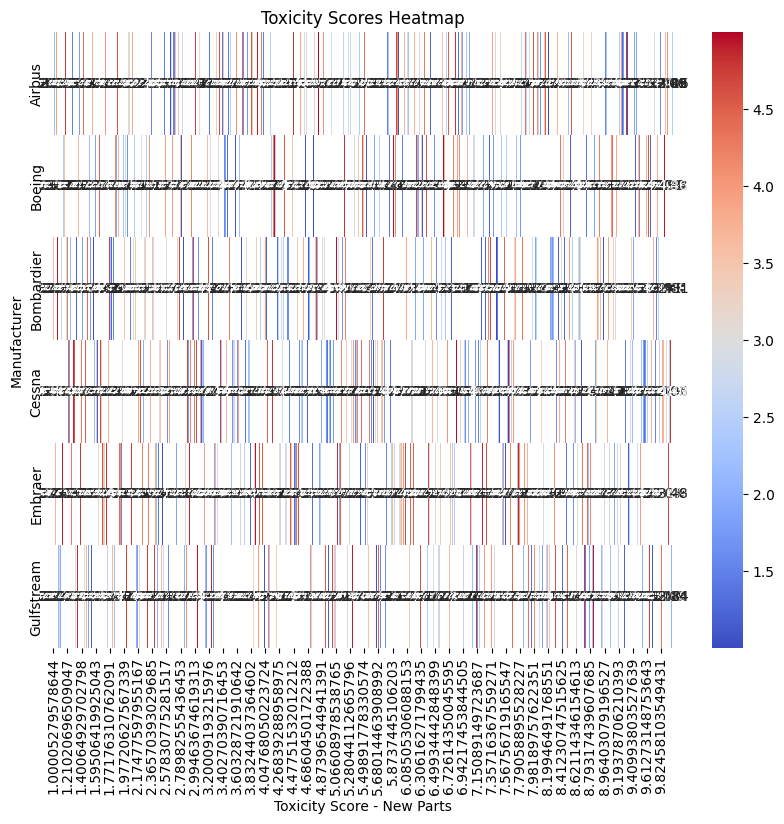

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the dataset into a Pandas DataFrame called 'df'

# Selecting the relevant columns for the heatmap
heatmap_df = df[['Manufacturer', 'Toxicity Score - New Parts', 'Toxicity Score - Recycled Parts']]

# Pivot the dataframe to have Part Name as rows and Toxicity Scores as columns
heatmap_df = heatmap_df.pivot('Manufacturer', 'Toxicity Score - New Parts', 'Toxicity Score - Recycled Parts')

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)

# Adding labels and title for the heatmap
plt.xlabel('Toxicity Score - New Parts')
plt.ylabel('Manufacturer')
plt.title('Toxicity Scores Heatmap')

# Displaying the heatmap
plt.show()


In [31]:
import pandas as pd
import plotly.express as px

# Assuming you have loaded the dataset into a Pandas DataFrame called 'df'

# Selecting the relevant columns for the scatter plot
scatter_df = df[['Remanufacturing Potential', 'New Parts Carbon Footprint (kg CO2e)']]

# Creating an interactive scatter plot using Plotly Express
fig = px.scatter(scatter_df, x='Remanufacturing Potential', y='New Parts Carbon Footprint (kg CO2e)',
                 hover_data=df[['New Parts Carbon Footprint (kg CO2e)']], title='Impact of Remanufacturing Potential on Carbon Footprint')

# Adding labels for x and y axes
fig.update_layout(xaxis_title='Remanufacturing Potential', yaxis_title='Carbon Footprint - New Parts')

# Displaying the scatter plot
fig.show()


In [32]:
import pandas as pd
import plotly.express as px

# Assuming you have loaded the dataset into a Pandas DataFrame called 'df'

# Creating an interactive box plot or violin plot using Plotly Express
fig = px.box(df, x='Aircraft Model', y='Life Cycle Assessment Score', title='Comparison of Life Cycle Assessment Scores by Aircraft Model',
             hover_data=['Part Name'])

# Uncomment the line below if you prefer to use a violin plot instead
# fig = px.violin(df, x='Aircraft Model', y='Life Cycle Assessment Score', title='Comparison of Life Cycle Assessment Scores by Aircraft Model',
#                 hover_data=['Part Name'])

# Adding labels for x and y axes
fig.update_layout(xaxis_title='Aircraft Model', yaxis_title='Life Cycle Assessment Score')

# Displaying the box plot or violin plot
fig.show()


In [34]:
import plotly.express as px

# Group the data by continent and count the number of parts in each continent
continent_counts = df['Location'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Count']

# Create an interactive geographical map
fig = px.scatter_geo(continent_counts, locations='Continent', locationmode='ISO-3', color='Count',
                     hover_name='Continent', size='Count', projection='natural earth')

fig.update_layout(
    title='Distribution of Parts by Continent',
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular')
)

# Show the interactive map
fig.show()
